In [2]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import cifar10
import pickle
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sn
# modules
from Ops.spectral_normalization import SpectralConv2D, SpectralDense
from Ops.ops import ResnetBlock, ResnetBlockUp, ResnetBlockDown
from Ops.attention import Attention
from Ops.global_sum_pooling import GlobalSumPooling2D
from Ops.conditional_batch_normalization import ConditionalBatchNormalization

In [3]:
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
test_x = test_x.astype('float32')
test_x = (test_x - 127.5) / 127.5
classes = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [3]:
def plot_graphs(history):
    h = pickle.load(open(history, 'rb'))
    
    losses = h['loss']
    val_losses = h['val_loss']
    val_accs = h['val_sparse_categorical_accuracy']
    accs = h['sparse_categorical_accuracy']

    plt.plot(range(0,len(losses)), losses, label='loss')
    plt.plot(range(0,len(val_losses)), val_losses, label='val_loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.ylim(bottom=0)
    plt.legend()
    plt.show()
    
    plt.plot(range(0,len(accs)), accs, label='accuracy')
    plt.plot(range(0,len(val_accs)), val_accs, label='val_accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.ylim(bottom=0)
    plt.legend()
    plt.show()

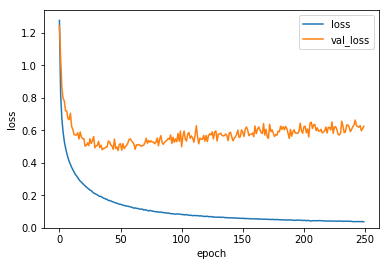

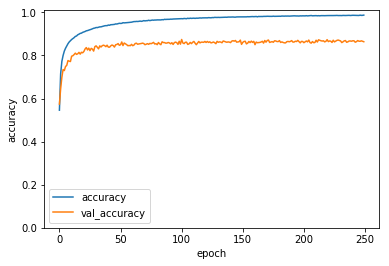

In [4]:
plot_graphs('BigGANClf_fake2.p')

# BigGAN

## S1

In [5]:
custom_objects={'SpectralConv2D': SpectralConv2D, 'SpectralDense':SpectralDense}
discriminator = load_model('./BigGANClf_v2.h5', custom_objects=custom_objects)
_eval = discriminator.evaluate(test_x, test_y)
predictions = discriminator.predict(test_x)
predictions = [np.argmax(p) for p in predictions]
labels = np.reshape(test_y, (len(predictions)))

313/313 [==============================] - 2s 8ms/step - loss: 0.6188 - sparse_categorical_accuracy: 0.8697


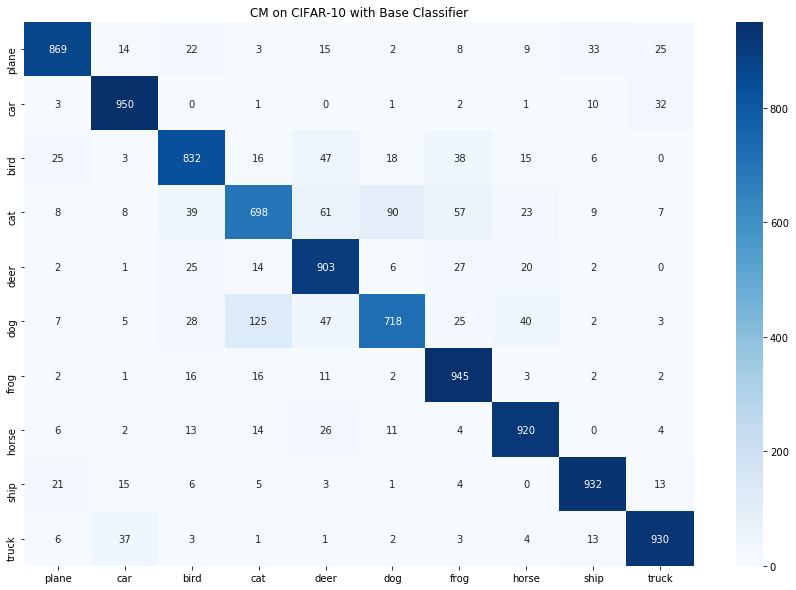

In [6]:
cm = tf.math.confusion_matrix(labels, predictions, num_classes=10)
plt.figure(figsize=(15,10))
plt.title('CM on CIFAR-10 with Base Classifier')
sn.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt="d", xticklabels=classes, yticklabels=classes)

## S2 w/ StyleGAN2-ADA

In [7]:
custom_objects={'SpectralConv2D': SpectralConv2D, 'SpectralDense':SpectralDense}
discriminator = load_model('./BigGANClf_fake_v2.h5', custom_objects=custom_objects)
_eval = discriminator.evaluate(test_x, test_y)
predictions = discriminator.predict(test_x)
predictions = [np.argmax(p) for p in predictions]
labels = np.reshape(test_y, (len(predictions)))

313/313 [==============================] - 2s 7ms/step - loss: 0.5051 - sparse_categorical_accuracy: 0.8858


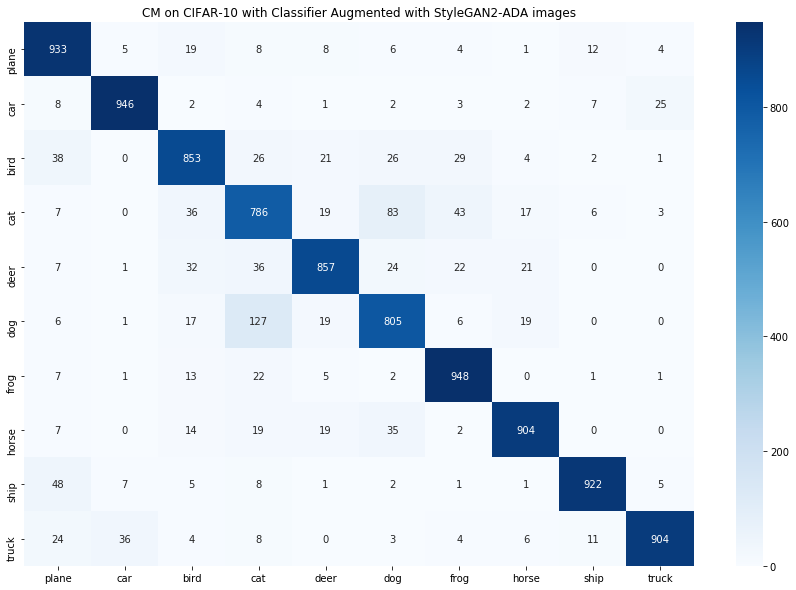

In [8]:
cm = tf.math.confusion_matrix(labels, predictions, num_classes=10)
plt.figure(figsize=(15,10))
plt.title('CM on CIFAR-10 with Classifier Augmented with StyleGAN2-ADA images')
sn.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt="d", xticklabels=classes, yticklabels=classes)

## S2 w/ BigAC-GAN

In [9]:
custom_objects={'SpectralConv2D': SpectralConv2D, 'SpectralDense':SpectralDense}
discriminator = load_model('./BigGANClf_fake2.h5', custom_objects=custom_objects)
_eval = discriminator.evaluate(test_x, test_y)
predictions = discriminator.predict(test_x)
predictions = [np.argmax(p) for p in predictions]
labels = np.reshape(test_y, (len(predictions)))

313/313 [==============================] - 2s 7ms/step - loss: 0.6671 - sparse_categorical_accuracy: 0.8617


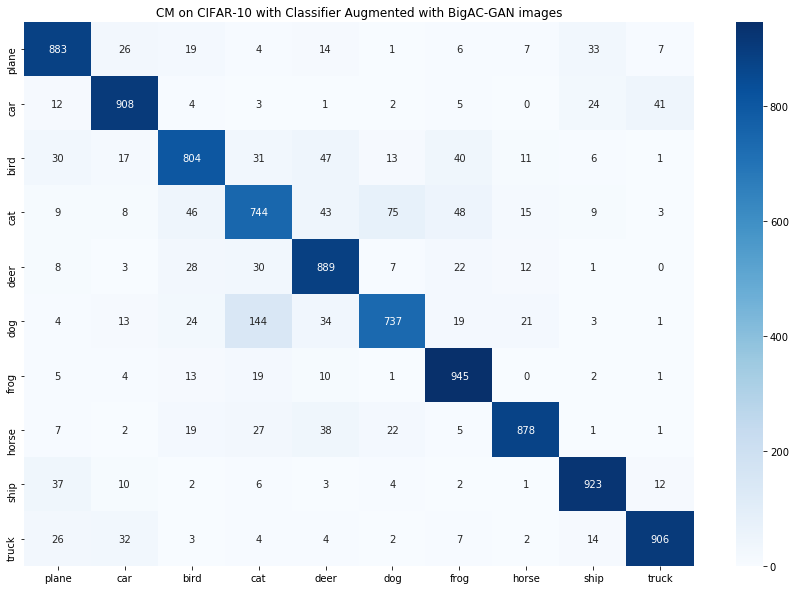

In [10]:
cm = tf.math.confusion_matrix(labels, predictions, num_classes=10)
plt.figure(figsize=(15,10))
plt.title('CM on CIFAR-10 with Classifier Augmented with BigAC-GAN images')
sn.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt="d", xticklabels=classes, yticklabels=classes)

## S3

In [4]:
#measure accuracy on CIFAR10 test data
discriminator = '../../ACGAN/history/bigacgan/bigacgan-cifar10-1/training_checkpoints/discriminator-e250.h5'
custom_objects={'SpectralConv2D': SpectralConv2D, 'SpectralDense':SpectralDense}
discriminator = load_model(discriminator, custom_objects=custom_objects)
_eval = discriminator.evaluate(test_x, test_y, batch_size=64)

_, predictions = discriminator.predict(test_x)
predictions = [np.argmax(p) for p in predictions]
labels = np.reshape(test_y, (len(predictions)))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


AttributeError: in user code:

    /home/augustosilva/msc/Classifiers_ACGAN/BigGAN/Ops/spectral_normalization.py:100 call  *
        W_bar = spectrally_normalize_weight(
    /home/augustosilva/msc/Classifiers_ACGAN/BigGAN/Ops/spectral_normalization.py:49 spectrally_normalize_weight  **
        W_bar = tf_utils.smart_cond(

    AttributeError: module 'tensorflow.python.keras.utils.tf_utils' has no attribute 'smart_cond'


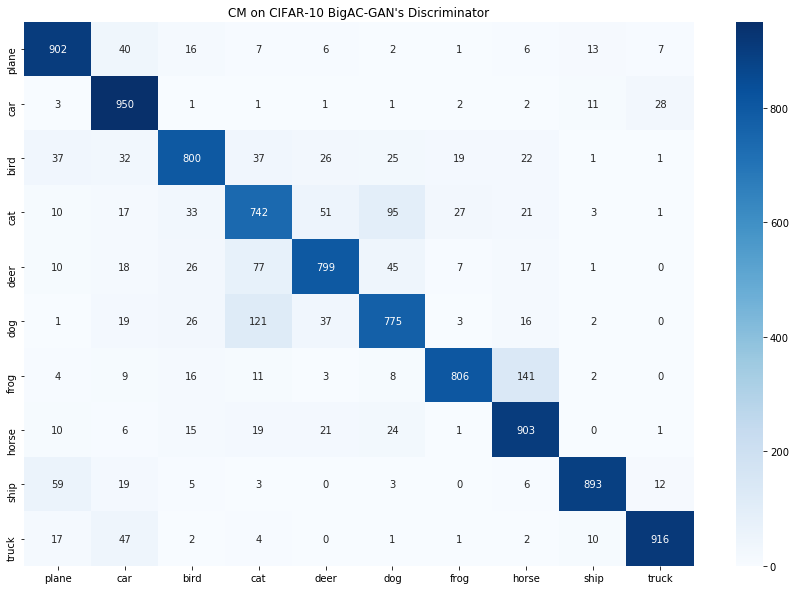

In [12]:
cm = tf.math.confusion_matrix(labels, predictions, num_classes=10)
plt.figure(figsize=(15,10))
plt.title('CM on CIFAR-10 BigAC-GAN\'s Discriminator')
sn.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt="d", xticklabels=classes, yticklabels=classes)